hotel: The type of hotel, either "City Hotel" or "Resort Hotel.", resort = vacances

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate. combien gagne l'hotel, pour la journée donnée, par chambre

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. (Not Real)

email: Guest's email address.(Not Real)

phone-number: Guest's phone number. (Not Real)

credit_card: Guest's credit card details. (Not Real)

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from fct import *
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes

In [29]:
df = pd.read_csv("../hotel_bookings.csv", sep=",")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Cleaning

### NaN and select columns

In [30]:
colonne_a_garder = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests"]
df = df[colonne_a_garder]
df.dropna(inplace=True)
df.drop_duplicates(subset=colonne_a_garder, inplace=True)
print(df.isnull().sum())



hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


## type of columns (date, ...)

In [31]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

df_temporel = df.copy()
df_temporel.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True)
df.drop(["arrival_date"], axis=1, inplace=True)

df['arrival_date_year'] = df['arrival_date_year'] - 2015
print(df.head())
# print(df_temporel.head())



          hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342                  0   
1  Resort Hotel            0        737                  0   
2  Resort Hotel            0          7                  0   
3  Resort Hotel            0         13                  0   
4  Resort Hotel            0         14                  0   

   arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
0                   7                          1                        0   
1                   7                          1                        0   
2                   7                          1                        0   
3                   7                          1                        0   
4                   7                          1                        0   

   stays_in_week_nights  adults  children  babies meal country market_segment  \
0                     0       2       0.0       0   BB     PRT         Direct   
1 

## nettoyage données valeurs aberrantes (var quanti), modalité seule (var quali)

In [32]:
columns_to_filter_quanti = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces"]
columns_to_filter_quali = ["reserved_room_type", "assigned_room_type"]

# Filter variables quanti
for column in columns_to_filter_quanti:
    df = filter_occurence_variable(df, column, 10)
    df_temporel = filter_occurence_variable(df_temporel, column, 10)

# Filter variables quali
for column in columns_to_filter_quali:
    df = filter_occurence_variable(df, column, 10)
    df_temporel = filter_occurence_variable(df_temporel, column, 10)

df = df[df['meal'] != "Undefined"]
df_temporel = df_temporel[df_temporel['meal'] != "Undefined"]

## Encodage One-hot pour algo machine learning

In [33]:
col_quali = ["hotel", "meal", "country", "market_segment", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
df_encoded = pd.get_dummies(df, columns=col_quali, dtype=int)
# df_encoded.drop(["arrival_date"], axis=1, inplace=True)
for col in df_encoded.columns:
    if df_encoded[col].dtype != "float64":
        df_encoded[col] = df_encoded[col].astype('int64')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68439 entries, 0 to 119389
Columns: 227 entries, is_canceled to customer_type_Transient-Party
dtypes: float64(2), int64(225)
memory usage: 119.0 MB


## Standardiser ou normaliser les variables quantitatives

In [34]:
# df = standardisation(df)
# df_encoded = standardisation(df_encoded)
df['lead_time'] = np.log(df['lead_time'] + 1)
df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month'] + 1)
df['adr'] = np.log(df['adr'] + 1)

df_temporel['lead_time'] = np.log(df_temporel['lead_time'] + 1)
df_temporel['adr'] = np.log(df_temporel['adr'] + 1)

df_encoded['lead_time'] = np.log(df_encoded['lead_time'] + 1)
df_encoded['arrival_date_day_of_month'] = np.log(df_encoded['arrival_date_day_of_month'] + 1)
df_encoded['adr'] = np.log(df_encoded['adr'] + 1)


df.to_csv("data/df.csv", index=False)
df_temporel.to_csv("data/df_temporel.csv", index=False)
df_encoded.to_csv("data/df_encoded.csv", index=False)

# Modèles de prédictions

## Régression logistique

bonne accuracy: pas dû à distribution_channel, pas dû au fait qu'il y a + de données (sans enlever doublons et occurences min) 

Raison: reservation_status permet de passer de 0.82 d'accuracy à 1

mettre la date de réservation permet de passer de 0.82 à 0.90

Je pense qu'il esy mieux de mettre toutes les colonnes pour un modèle

Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      9892
           1       0.69      0.51      0.59      3796

    accuracy                           0.80     13688
   macro avg       0.76      0.71      0.73     13688
weighted avg       0.79      0.80      0.79     13688



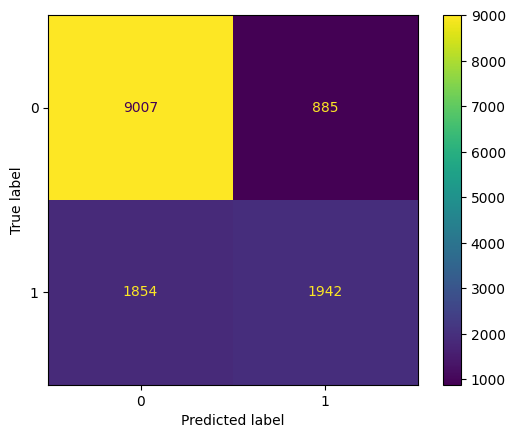

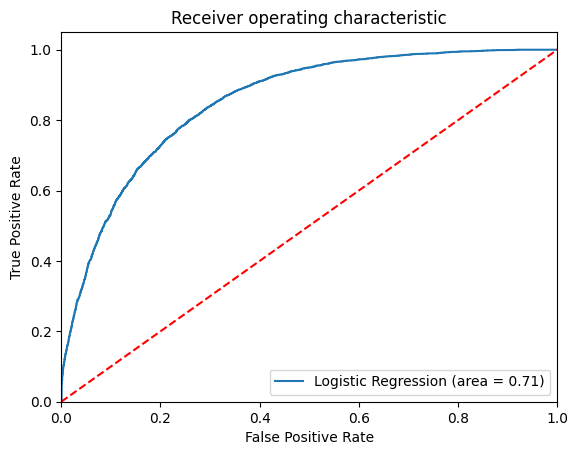

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

scores_accuracy = {}
scores_auc = {}


X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

logreg = LogisticRegression()

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.2, random_state=0)

logreg.fit(X_train_l, y_train_l)
y_pred = logreg.predict(X_test_l)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_l, y_test_l)))

cm = confusion_matrix(y_test_l, y_pred)
confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_).plot()
print(classification_report(y_test_l, y_pred))

logit_roc_auc = roc_auc_score(y_test_l, logreg.predict(X_test_l))
fpr, tpr, thresholds = roc_curve(y_test_l, logreg.predict_proba(X_test_l)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

scores_accuracy['Logistic Regression'] = logreg.score(X_test_l, y_test_l)
scores_auc['Logistic Regression'] = roc_auc_score(y_test_l, y_pred)

## Méthode de Boosting

On va essayer de voir quellee méthode de Boosting je vais appliquer sur mes données entre XGBoost, CatBoost, Gradient Boosting ou AdaBoost

Chaque algorithme de boosting a ses propres forces et faiblesses, et le choix entre eux dépend souvent du contexte spécifique. Voici quelques considérations générales :

1. **AdaBoost** : AdaBoost est l'un des premiers algorithmes de boosting. Il est simple et efficace, mais il est aussi plus sensible aux valeurs aberrantes et au surapprentissage que d'autres méthodes de boosting. De plus, AdaBoost peut être plus lent à entraîner que des méthodes plus récentes comme XGBoost ou CatBoost.

2. **Gradient Boosting** : Le Gradient Boosting est une amélioration de AdaBoost qui utilise la descente de gradient pour minimiser l'erreur. Il est généralement plus performant que AdaBoost, mais il peut aussi être sujet au surapprentissage si le nombre d'itérations (ou "arbres") est trop élevé. De plus, comme AdaBoost, il peut être plus lent à entraîner que XGBoost ou CatBoost.

3. **XGBoost** : XGBoost est une implémentation optimisée du Gradient Boosting qui est conçue pour être très efficace et flexible. Il a tendance à être plus rapide et à donner de meilleurs résultats que AdaBoost ou le Gradient Boosting standard. Cependant, XGBoost peut être plus difficile à calibrer car il a de nombreux hyperparamètres.

4. **CatBoost** : CatBoost est un algorithme de boosting qui a été spécialement conçu pour gérer les variables catégorielles. Si votre jeu de données contient de nombreuses variables catégorielles, CatBoost peut être une bonne option. Cependant, comme XGBoost, CatBoost a de nombreux hyperparamètres et peut être plus difficile à calibrer.

En résumé, si votre jeu de données contient de nombreuses valeurs aberrantes ou si vous êtes préoccupé par le surapprentissage, vous pourriez vouloir éviter AdaBoost. Si votre jeu de données est très grand et que le temps d'entraînement est une préoccupation, vous pourriez vouloir éviter AdaBoost et le Gradient Boosting standard en faveur de XGBoost ou CatBoost. Si votre jeu de données contient de nombreuses variables catégorielles, CatBoost pourrait être une bonne option. Enfin, si la simplicité et l'interprétabilité sont des préoccupations, vous pourriez vouloir choisir AdaBoost ou le Gradient Boosting standard plutôt que XGBoost ou CatBoost.

Par simplicité, nous préfèrerions Gradient Boosting, qui est meilleure que AdaBoost. Cependant, XGBoost offre de bons résultats, CatBoost aussi mais pour CatBoost, on a déjà encoder les variables donc sa principale utilité est futile.

Pour l'instant, nous allons juste utiliser la méthode Random Forest

### Random Forest

Accuracy of random forest classifier on test set: 0.83


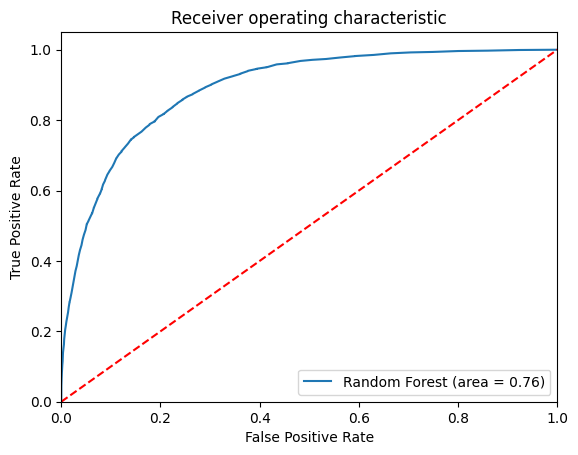

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_r, y_train_r)
y_pred_rf = rf.predict(X_test_r)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_score(y_test_r, y_pred_rf)))

rf_roc_auc = roc_auc_score(y_test_r, rf.predict(X_test_r))
fpr, tpr, thresholds = roc_curve(y_test_r, rf.predict_proba(X_test_r)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

scores_accuracy['Random Forest'] = accuracy_score(y_test_r, y_pred_rf)
scores_auc['Random Forest'] = roc_auc_score(y_test_r, y_pred_rf)

### Importance

In [37]:
# Obtenir les importances des variables
importances = rf.feature_importances_

# Créer un DataFrame pour stocker les importances et les noms des variables
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Trier le DataFrame par ordre décroissant d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les importances des variables
importance_df.to_csv("importance.csv", index=False)

### Gradient Boosting

Accuracy of gradient boosting classifier on test set: 0.81


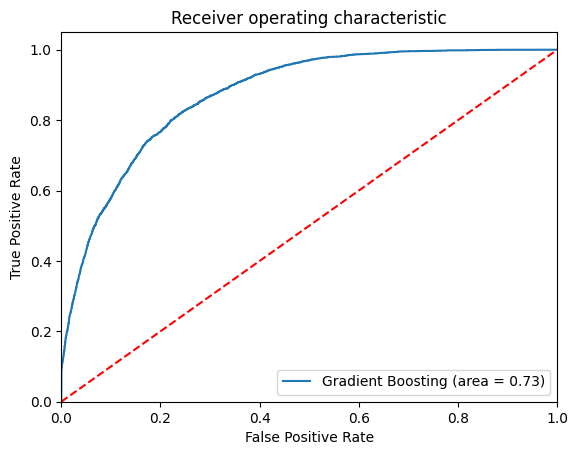

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=0)
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train_gb, y_train_gb)
y_pred_gb = gb.predict(X_test_gb)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(accuracy_score(y_test_gb, y_pred_gb)))

gb_roc_auc = roc_auc_score(y_test_gb, gb.predict(X_test_gb))
fpr, tpr, thresholds = roc_curve(y_test_gb, gb.predict_proba(X_test_gb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Gb_ROC')
plt.show()

scores_accuracy['Gradient Boosting'] = accuracy_score(y_test_gb, y_pred_gb)
scores_auc['Gradient Boosting'] = roc_auc_score(y_test_gb, y_pred_gb)


## ANN

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn import metrics
import plotly.express as px


# Rest of the code
X = df_encoded.drop('is_canceled', axis=1)
y = to_categorical(df_encoded['is_canceled'])
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(X, y, test_size=0.2, random_state=0)
epochs = 10

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (X_train_deep.shape[1], )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train_deep, y_train_deep, validation_data = (X_test_deep, y_test_deep),
                          epochs = epochs)


train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, epochs + 1)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

Epoch 1/10
1711/1711 [==============================] - 11s 6ms/step - loss: 0.4197 - accuracy: 0.7961 - val_loss: 0.3925 - val_accuracy: 0.8065
Epoch 2/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8182 - val_loss: 0.3809 - val_accuracy: 0.8179
Epoch 3/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3665 - accuracy: 0.8267 - val_loss: 0.3797 - val_accuracy: 0.8123
Epoch 4/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3591 - accuracy: 0.8305 - val_loss: 0.3675 - val_accuracy: 0.8209
Epoch 5/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8324 - val_loss: 0.3631 - val_accuracy: 0.8252
Epoch 6/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3492 - accuracy: 0.8336 - val_loss: 0.3670 - val_accuracy: 0.8216
Epoch 7/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3441 - accuracy: 0.8366 - val_loss: 0.3609 - val_accuracy

428/428 [==============================] - 0s 1ms/step


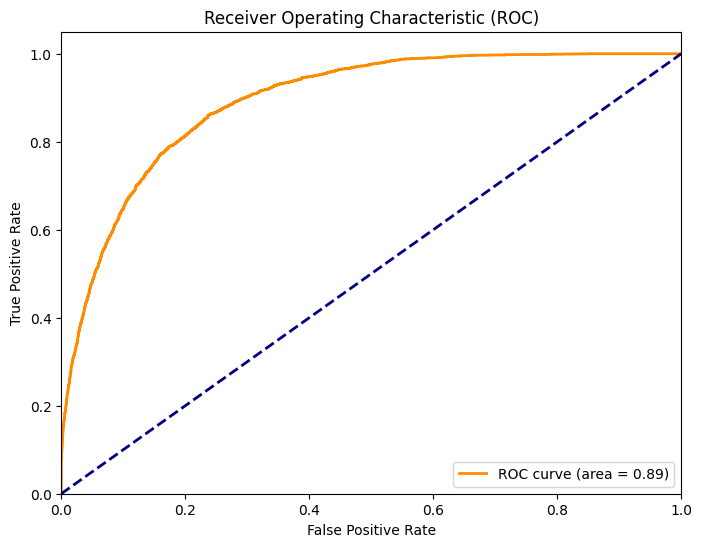

428/428 [==============================] - 0s 985us/step


In [53]:
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test_deep[:,1], model.predict(X_test_deep)[:,1])
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC avec l'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

scores_accuracy['Neural Network'] = model.evaluate(X_test_deep, y_test_deep, verbose=0)[1]
scores_auc['Neural Network'] = roc_auc_score(y_test_deep[:,1], model.predict(X_test_deep)[:,1])

## Affichage des AUC

In [41]:
print("AUC:", sorted(scores_auc.items(), key=lambda x: x[1], reverse=False))
print("Accuracy:", sorted(scores_accuracy.items(), key=lambda x: x[1], reverse=False))


AUC: [('Logistic Regression', 0.7110624566178798), ('Gradient Boosting', 0.7271599129396215), ('Random Forest', 0.7611567414909259), ('Neural Network', 0.8927680407835605)]
Accuracy: [('Logistic Regression', 0.7998977206312098), ('Gradient Boosting', 0.8137784921098773), ('Neural Network', 0.8277323246002197), ('Random Forest', 0.8312390414962011)]


428/428 [==============================] - 0s 984us/step


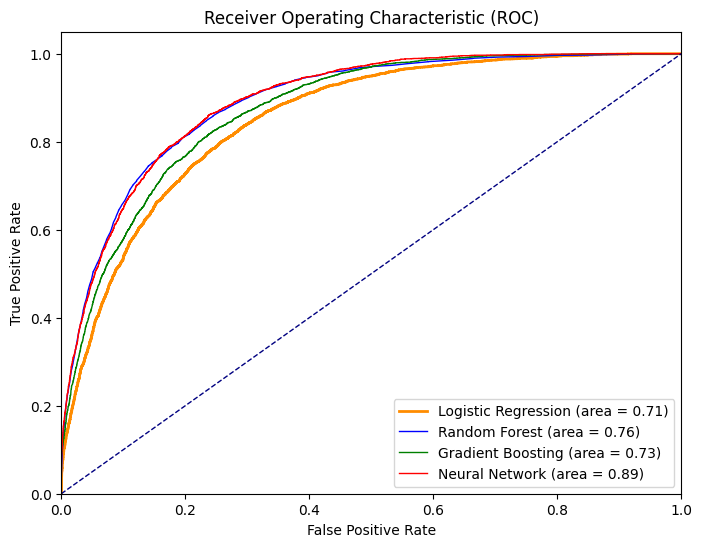

In [51]:
# Calculer la courbe ROC et l'AUC

logit_roc_auc = roc_auc_score(y_test_l, logreg.predict(X_test_l))
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test_l, logreg.predict_proba(X_test_l)[:,1])

rf_roc_auc = roc_auc_score(y_test_r, rf.predict(X_test_r))
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_r, rf.predict_proba(X_test_r)[:,1])

gb_roc_auc = roc_auc_score(y_test_gb, gb.predict(X_test_gb))
fpr_gb, tpr_gb, thresholds = roc_curve(y_test_gb, gb.predict_proba(X_test_gb)[:,1])

nn_roc_auc = roc_auc_score(y_test_deep, model.predict(X_test_deep))
fpr_nn, tpr_nn, thresholds = metrics.roc_curve(y_test_deep[:,1],  model.predict(X_test_deep)[:,1])

# nn_roc_auc = roc_auc_score(y_test_deep, model.predict(X_test_deep))
# fpr_nn, tpr_nn, thresholds = roc_curve(y_test_deep[:,1], model.predict(X_test_deep)[:,1])

# Afficher la courbe ROC avec l'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr_gb, tpr_gb, color='green', lw=1, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot(fpr_nn, tpr_nn, color='red', lw=1, label='Neural Network (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# nn_roc_auc = roc_auc_score(y_test_deep, model.predict(X_test_deep))
# fpr_nn, tpr_nn, thresholds = roc_curve(y_test_deep[:,1], model.predict(X_test_deep)[:,1])